<h3>Our objective is to load a stock market dataset and observe patterns and seasonality in the data and train the model in order to forecast future prices accurately. Finally, we will compare the model built on neural networks with ARIMA/SARIMAX models.

<h4>Importing the neccesary libraries</h4>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Loading the dataset</h4>

In [3]:
df = pd.read_csv('indexProcessed.csv',index_col = 1,parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104224 entries, 1986-12-31 to 2021-05-31
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Open       104224 non-null  float64
 2   High       104224 non-null  float64
 3   Low        104224 non-null  float64
 4   Close      104224 non-null  float64
 5   Adj Close  104224 non-null  float64
 6   Volume     104224 non-null  float64
 7   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(1)
memory usage: 7.2+ MB


<h5>Index - Stock Indexes </h5>
<h5>Open - Opening values of the stock</h5>
<h5>High - Highest value of the stock in a day</h5>
<h5>Low	- Lowest values of the stock in a day</h5>
<h5>Close - Closing values of the stock (in domestic currency)</h5>
<h5>Adj Close  - Adjusted Closing values of the stock (After a dividend is announced)</h5>
<h5>Volume - Volume of stocks traded</h5>
<h5>CloseUSD - Closing values of the stock in USD</h5>

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [4]:
df.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1986-12-31,HSI,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1987-01-02,HSI,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
1987-01-05,HSI,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
1987-01-06,HSI,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
1987-01-07,HSI,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


<h5> Since we have closing values listed in USD, we can drop the 'Close' column </h5>

In [5]:
df = df.drop('Close',axis='columns')

In [6]:
df.Index.unique()

array(['HSI', 'NYA', 'IXIC', '000001.SS', 'N225', 'N100', '399001.SZ',
       'GSPTSE', 'NSEI', 'GDAXI', 'SSMI', 'TWII', 'J203.JO'], dtype=object)

<AxesSubplot:ylabel='Index'>

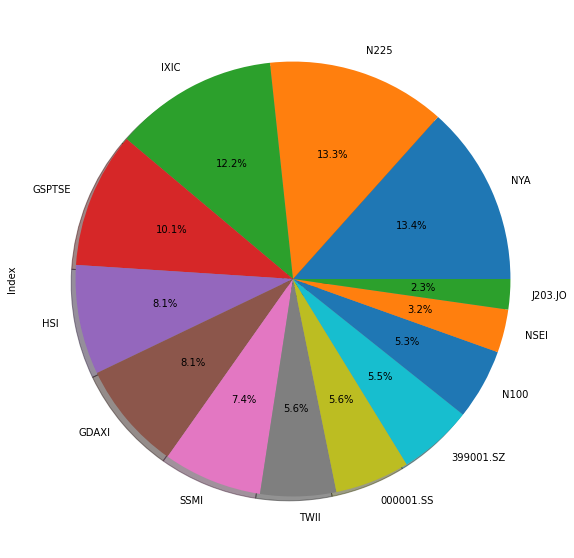

In [7]:
plt.figure(figsize=(10,10))
df.Index.value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

<h5>Since, maximum data is available for NYA,</h5>
<h5>We'll predict closing values for NYA Index</h5>

In [8]:
NYA = df.groupby(df.Index).get_group('NYA')

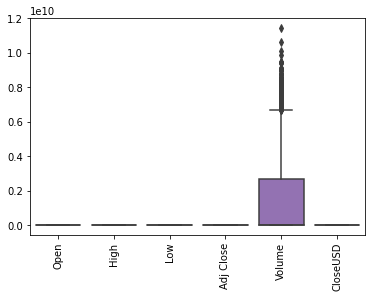

In [9]:
sns.boxplot(data=NYA)
plt.xticks(rotation="90")
plt.show()

<h4>There are plenty of outliers in the 'Volume' column. 
We can get rid of them by log transformation or by simply considering 3 x (standard deviation) data from the mean.

In [10]:
NYA.Volume

Date
1965-12-31    0.000000e+00
1966-01-03    0.000000e+00
1966-01-04    0.000000e+00
1966-01-05    0.000000e+00
1966-01-06    0.000000e+00
                  ...     
2021-05-24    2.947400e+09
2021-05-25    3.420870e+09
2021-05-26    3.674490e+09
2021-05-27    5.201110e+09
2021-05-28    4.199270e+09
Name: Volume, Length: 13947, dtype: float64

<h4>Values equal to absolute zero exist in the 'Volume' column, therefore log transformation isn't feasible. 

In [11]:
upper_lim = NYA.Volume.mean() +3*NYA.Volume.std()  ## Removing the outliers
lower_lim = NYA.Volume.mean() -3*NYA.Volume.std()

In [12]:
NYA = NYA[(NYA.Volume > lower_lim) & (NYA.Volume < upper_lim)]

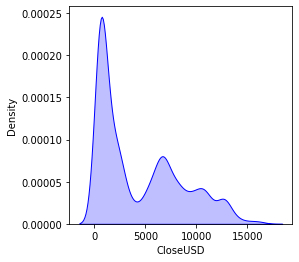

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))
ax =sns.kdeplot(NYA['CloseUSD'], shade=True, color="b")

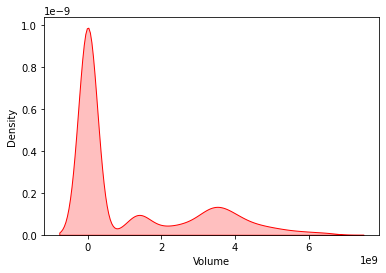

In [14]:
ax = sns.kdeplot(NYA['Volume'], shade=True, color="r")

<AxesSubplot:>

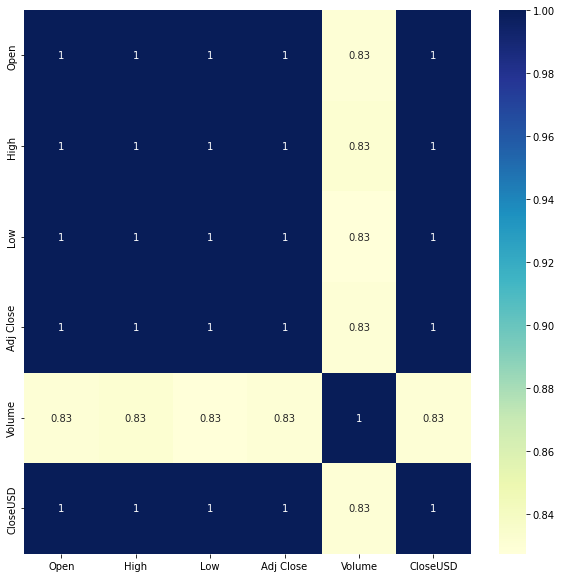

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(NYA.corr(), cmap='YlGnBu', annot = True)

<h3>All features show strong correlation.</h3>

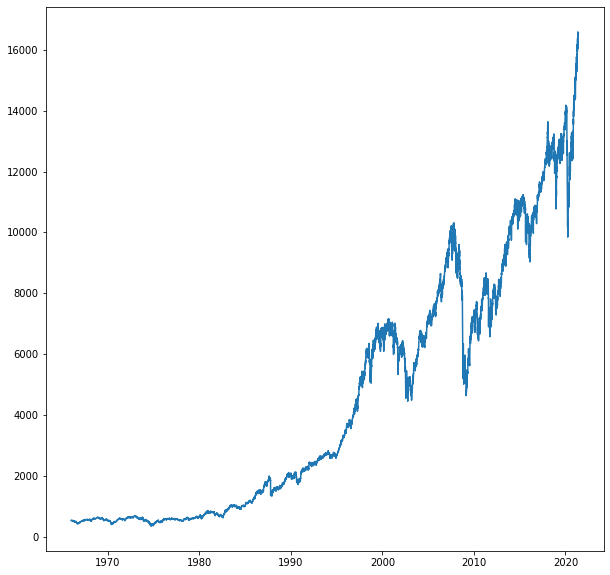

In [16]:
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(NYA['CloseUSD'])

In [17]:
NYA = NYA.drop(['Index'], axis = 'columns')

In [18]:
y = NYA['CloseUSD']
X = NYA.drop('CloseUSD',axis = 'columns')

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

<h4>It is crucial to scale our dataset since, the units of Volume and CloseUSD are evidently different.

In [20]:
mmc = MinMaxScaler()
scaled_NYA = mmc.fit_transform(NYA)
scaled_NYA = pd.DataFrame(scaled_NYA , columns = ['Open','High','Low','Adj Close','Volume','CloseUSD'])

In [21]:
scaled_NYA

,Open,High,Low,Adj Close,Volume,CloseUSD
0,0.011139,0.011073,0.011179,0.011139,0.000000,0.011139
1,0.011047,0.010983,0.011087,0.011047,0.000000,0.011047
2,0.011086,0.011021,0.011126,0.011086,0.000000,0.011086
3,0.011288,0.011222,0.011329,0.011288,0.000000,0.011288
4,0.011347,0.011280,0.011388,0.011347,0.000000,0.011347
...,...,...,...,...,...,...
13818,0.986737,0.989144,0.990302,0.992259,0.438855,0.992259
13819,0.992259,0.990202,0.990312,0.987672,0.509352,0.987672
13820,0.987672,0.986562,0.991125,0.991475,0.547115,0.991475
13821,0.991475,0.991460,0.995058,0.996400,0.774422,0.996400


<h4>Splliting our dataset into training and testing samples,

In [22]:
train1 = scaled_NYA.iloc[:int(len(NYA)*0.8)]
test1 = scaled_NYA.iloc[int(len(NYA)*0.8):]

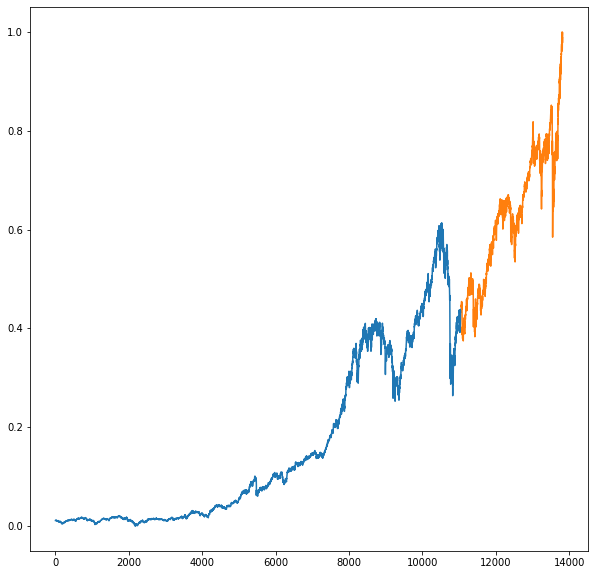

In [23]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(train1.CloseUSD)
ax.plot(test1.CloseUSD)

In [24]:
X_train1,X_test1,y_train1,y_test1 = train1.drop('CloseUSD',axis='columns'),test1.drop(['CloseUSD'],axis='columns'),train1['CloseUSD'],test1['CloseUSD']

<h4>Time to build the model, we first define a custom made function (build_model) which will look for the optimum no. of layers and find the best hyperparameters using Hyperband.

In [25]:
from tensorflow import keras 

In [26]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(5, 1)))

    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 16)
    model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
    model.add(keras.layers.Dense(10))

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-1,1e-2, 1e-3, 1e-4,1e-5]) 

    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.MeanAbsoluteError(), 
                metrics = ['accuracy'])

    return model

In [27]:
import keras_tuner as kt
tuner = kt.Hyperband(build_model,
                         objective = 'val_loss', 
                         max_epochs = 10,
                         factor = 3,)

tuner.search(X_train1, y_train1, epochs = 10, validation_data = (X_test1, y_test1))                     

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
INFO:tensorflow:Oracle triggered exit


<h4>Using the best hyperparameters to train the model,

In [28]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [29]:
model = tuner.hypermodel.build(best_hps)
model.fit(X_train1, y_train1, epochs=50, validation_split=0.2)

Epoch 1/50
277/277 [==============================] - 8s 3ms/step - loss: 0.0317 - accuracy: 0.0000e+00 - val_loss: 0.0355 - val_accuracy: 0.0000e+00
Epoch 2/50
277/277 [==============================] - 0s 1ms/step - loss: 3.2537e-04 - accuracy: 1.1305e-04 - val_loss: 0.0159 - val_accuracy: 0.0000e+00
Epoch 3/50
277/277 [==============================] - 0s 1ms/step - loss: 1.0991e-04 - accuracy: 0.0000e+00 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 4/50
277/277 [==============================] - 0s 1ms/step - loss: 8.2360e-05 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 5/50
277/277 [==============================] - 0s 1ms/step - loss: 8.1717e-05 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 6/50
277/277 [==============================] - 0s 2ms/step - loss: 8.2977e-05 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 7/50
277/277 [==============================] - 0s 1ms/step - loss: 8.2742

In [30]:
predicted = model.predict(X_test1)
y_test1_np = np.asarray(y_test1)

In [31]:
predicted.shape

(2765, 10)

<h4>Since the last layer had 10 neurons, we take the mean of all the outputs, 

In [32]:
mean_predicted = []
for i in range(len(predicted)-1):
    value = predicted[i].mean()
    mean_predicted.append(value)

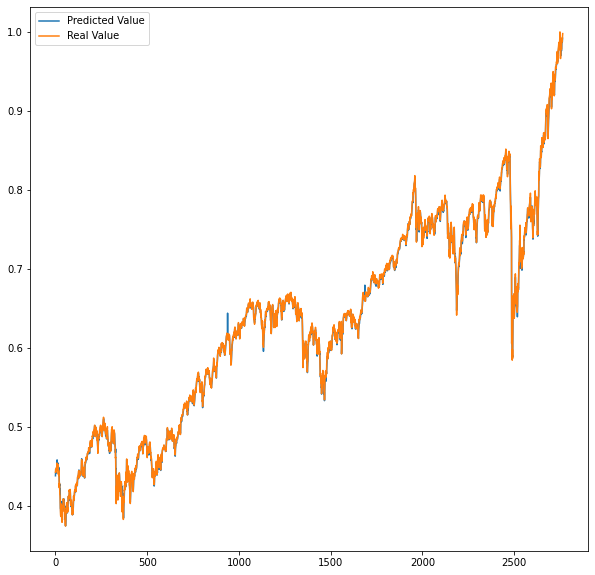

In [33]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(mean_predicted,label = 'Predicted Value')
ax.plot(y_test1_np,label = 'Real Value')
plt.legend(loc="upper left")

<h4>Our model has accurately predicted the closing values, given the independent variables</h4>
<h4>However the independent variables are not always available, in such a case we resort to time-series forecasting (works for this example)</h4>
<h4>ARIMA and SARIMAX model are some of the examples, and are used to find patterns in the time-series.</h4>

<h2>SARIMAX MODEL</h2>

In [34]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [35]:
arima_df = NYA['CloseUSD']
arima_df_filt = NYA['CloseUSD'].resample('MS').mean()

Using the Dickey Fuller test to determine if the series is stationary, 

In [36]:
adfuller(arima_df_filt)[1]

0.9967775033945339

Unless p-value is not less than 0.05, we cannot reject the null hypothesis. Therefore we keep differencing until the data is stationary (preferably seasonal difference)

In [37]:
arima_df1 = arima_df_filt.diff(12).dropna()

In [38]:
adfuller(arima_df1)[1]

2.875518550498391e-07

Since the P-Value is less then 0.05 , we can reject the null hypothesis and say that our series is staionary

<AxesSubplot:xlabel='Date'>

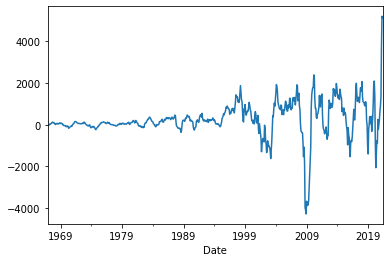

In [39]:
arima_df1.plot()

In order to determine the values of the parameters in ARIMA and SARIMAX, we take a look at the autocorrelation and partial autocorrelation plots

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

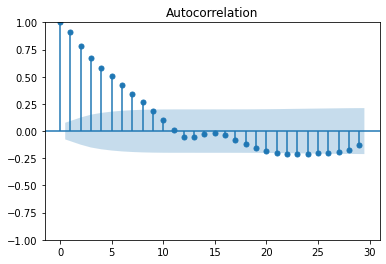

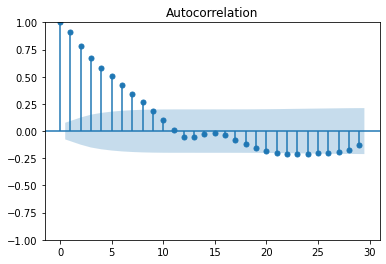

In [41]:
plot_acf((arima_df1))

c:\users\atuly\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


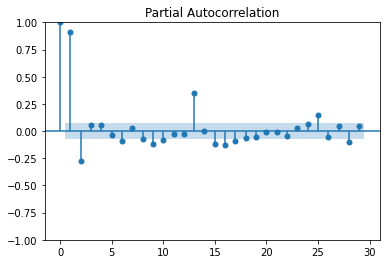

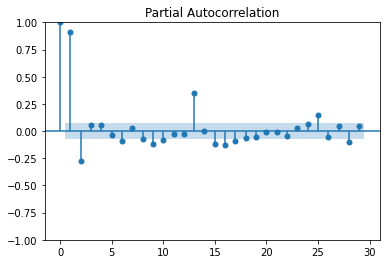

In [42]:
plot_pacf((arima_df1))

In [43]:
train_arima, test_arima = arima_df1[0:int(len(arima_df1)*0.8)], arima_df1[int(len(arima_df1)*0.8):len(arima_df1)]

Fitting the model with (p,d,q) = (1,1,1) 

In [44]:
predictions_sarimax = []
updating_list_sarimax = [z for z in test_arima]

<h3>Fitting the model and forecating the results - </h3>

In [45]:
for y in range(len(test_arima)):
    sarimax_model = sm.tsa.statespace.SARIMAX(updating_list_sarimax,order=(1,1,1),seasonal_order=(1,1,1,12))    
    model_fit = sarimax_model.fit()
    preds = model_fit.forecast()
    pred = list(preds)
    predictions_sarimax.append(pred)
    val = test_arima[y]
    updating_list_sarimax.append(val)

c:\users\atuly\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\atuly\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\atuly\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\atuly\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

c:\users\atuly\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\atuly\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\atuly\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\atuly\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

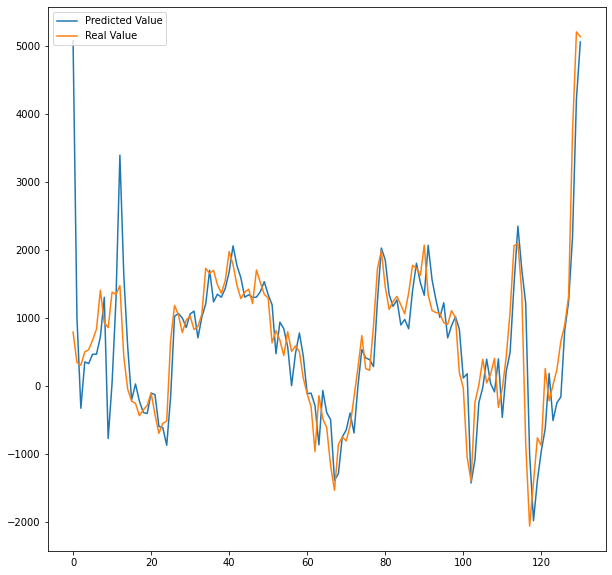

In [47]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(predictions_sarimax,label = 'Predicted Value')
ax.plot(np.array(test_arima),label = 'Real Value')
plt.legend(loc="upper left")
plt.show()

In [48]:
from sklearn.metrics import mean_absolute_error

In [50]:
error = mean_absolute_error(test_arima, predictions_sarimax)
print('Test error is {}'.format(error))

Test error is 408.020460291202


<h2>ARIMA MODEL</h2>

In [58]:
from statsmodels.tsa.arima.model import ARIMA

In [59]:
predictions_arima = []
updating_list_arima = [z1 for z1 in test_arima]

In [60]:
for r in range(len(test_arima)):
    arima_model = ARIMA(updating_list_arima,order=(1,1,1))    
    model_fit = arima_model.fit()
    preds = model_fit.forecast()
    pred = list(preds)
    predictions_arima.append(pred)
    val_ = test_arima[r]
    updating_list_arima.append(val_)

<h3>Fitting the model and forecating the results - </h3>

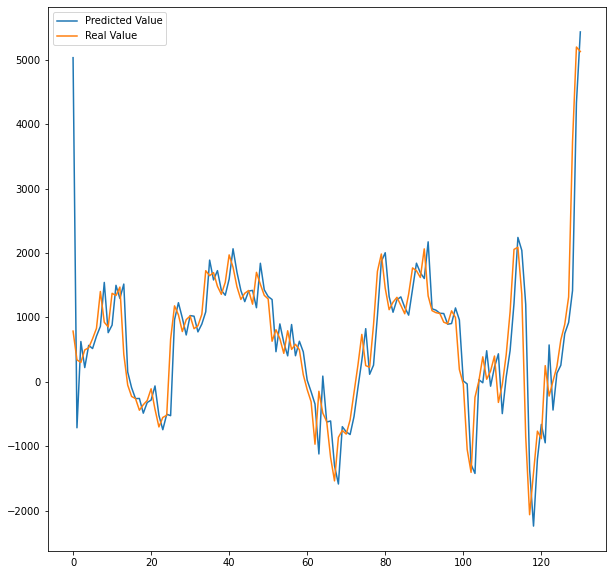

In [61]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(predictions_arima,label = 'Predicted Value')
ax.plot(np.array(test_arima),label = 'Real Value')
plt.legend(loc="upper left")

In [62]:
error = mean_absolute_error(test_arima, predictions_arima)
print('Test error is {}'.format(error))

Test error is 390.1216335258551


<h3>Combined plot - </h3>

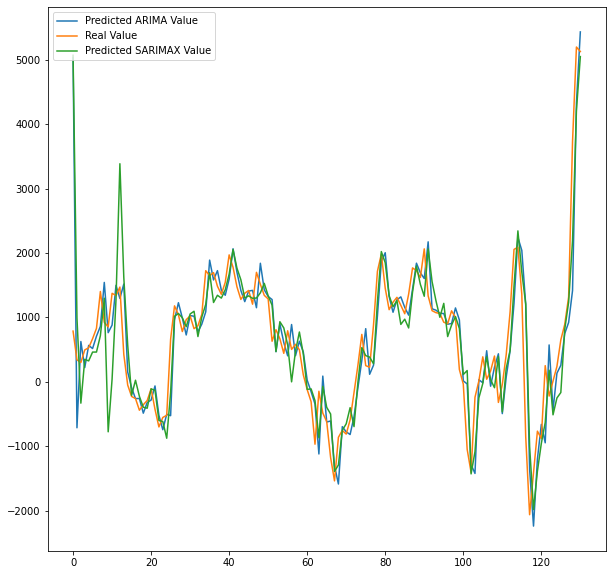

In [66]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(predictions_arima,label = 'Predicted ARIMA Value')
ax.plot(np.array(test_arima),label = 'Real Value')
ax.plot(predictions_sarimax,label = 'Predicted SARIMAX Value')
plt.legend(loc="upper left")

ARIMA and SARIMAX perform reasonably well but not in comparison to ANN. However, it is to be noted that ARIMA is an Auto-Regressive Model , these models can forecast without the help of other features (ex - Volume, Open, High). 
And thus, these models can be helpful in forecasting future stock prices, weather conditions etc. (data that follows a seasonal trend)